# A/B Tests

1.Set up the experiment.

2.Run the test and record the success rate for each group.

3.Plot the distribution of the difference between the two samples.

4.Calculate the statistical power.

5.Evaluate how sample size affects A/B tests.







## 1.Set up the experiment.



Hypothesis: Users who tend to purchase pay more attention assessment(user reviews)

Variant A: Showing current number of reviews

Variant B: Using walkability assessment(user reviews) the website




Description:

We will run an A/B test for a hypothetical company that is trying to increase the amount of users purchasing.The goal of running an A/B test is to evaluate if adding walkability assessment(user reviews) in a website will lead to improved performance in the metric. 



In [1]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import pandas as pd
import numpy as np
from src.plot import *

plt.style.use('ggplot')
data = pd.read_csv("AB_test_data.csv")
data.head()


,Variant,purchase_TF,date,id
0,A,False,2019-12-26,0x6f9421
1,A,False,2019-08-16,0x59d442
2,A,True,2019-03-18,0x6db8f8
3,A,False,2019-02-13,0x68245d
4,A,False,2019-09-28,0x28566e


In [2]:
import datetime
# y_date = datetime.datetime.strptime('20191231', '%Y%m%d').date()

In [3]:
# data_y = data[(data['date'] >= s_date) & (df['tra_date'] <= e_date)]
# data_y = data[(data['date'] >= y_date)]


def to_year(x):
    return x[:7]
data['time']=data['date'].apply(to_year)
df = data[data['time']=='2020-01']

In [4]:
'''
Baseline Conversion Rate and LiftBefore running the test, we will know 
the baseline conversion rate and the desired lift or increase in 
purchases that we would like to test.

For our example, we want to use our test to confirm that the 
changes we make to our signup process will result in at least 
a 2% increase in our sign up rate. 
'''
# 


# bcr =   # baseline conversion rate
# d_hat =   # difference between the groups


# A is control; B is test
# N_A = 50000
N_A = 3821
N_B = 5000


ab_data = df[['Variant','purchase_TF']]
ab_data.head()

,Variant,purchase_TF
5,A,False
7,B,False
9,A,False
10,A,False
11,A,False


In [5]:
len(ab_data)

8821

In [6]:
ab_data.columns = ['group','converted']

## Definitions

* Baseline conversion rate: shown as bsc below; equal to $p$ in the context of a binomial distribution and $p$ is the probability of success
* Minimum Detectable Effect: shown as mde below; sometimes referred to as the practical significance level (Udacity, Google)
* Statistical power 1−$\beta$ or sensitivity: typically 80% is used for most analyses; probability of rejecting the null hypothesis when the null hypothesis is indeed false
* Significance level $\alpha$: typically 5%; probabilty of rejecting the null hypothesis when the null hypothesis is true
* $\beta$: probability of accepting the null hypothesis when the null hypothesis is indeed false

## 2.Run the test and record the success rate for each group.

In [7]:
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')
ab_summary.head()

,converted,total,rate
group,,,
A,587.0,3821,0.153625
B,981.0,5000,0.196200


In [8]:
A_converted = ab_summary['converted'][0]
N_A = ab_summary['total'][0]
A_cr = ab_summary['rate'][0]
B_converted = ab_summary['converted'][1]
N_B = ab_summary['total'][1]
B_cr = ab_summary['rate'][1]

In [9]:
ab_summary['total'][0]

3821

In [10]:
A_converted = ab_summary['converted'][0]
A_total = ab_summary['total'][0]
A_cr = ab_summary['rate'][0]
B_converted = ab_summary['converted'][1]
B_total = ab_summary['total'][1]
B_cr = ab_summary['rate'][1]

In [11]:
bsc = A_cr
mde = B_cr - A_cr

# sig_level is typically denoted as alpha and power is sensitivity or (1-beta)
sig_level = 0.05
beta = 0.2

In [12]:
# n=50000
# bsc_binom = scs.binom(n, p=bsc)
# mde_binom = scs.binom(n, p=bsc+mde)

In [13]:
# fig, ax = plt.subplots(figsize=(12,12))
# x = np.linspace(0,int(n),int(n)+1)
# ax.bar(x, bsc_binom.pmf(x), alpha=0.5)
# ax.bar(x, mde_binom.pmf(x), alpha=0.5)

## 3.Plot the distribution of the difference between the two samples.

### Compare the results

We can compare the two groups by plotting the distribution of the control group and calculating the probability of getting the result from our test group. We can assume that the distribution for our control group is binomial because the data is a series of Bernoulli trials, where each trial only has two possible outcomes (similar to a coin flip).

Text(0, 0.5, 'probability')

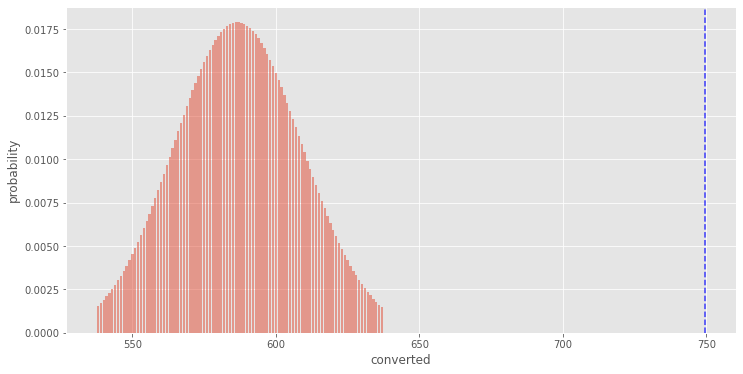

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(A_converted-49, A_converted+50, 100)
y = scs.binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')

Text(0, 0.5, 'probability')

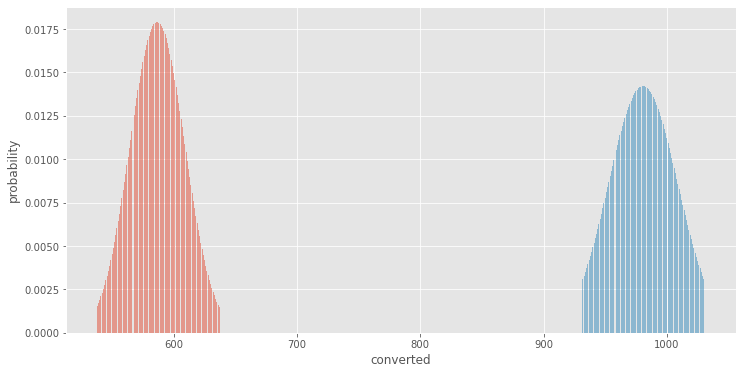

In [15]:
p_B = B_cr
p_A = A_cr
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-49, A_converted+50, 100)
yA = scs.binom(A_total, p_A).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, p_B).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('converted')
plt.ylabel('probability')

We can see that the test group converted more users than the control group. We can also see that the peak of the test group results is lower than the control group. How do we interpret the difference in peak probability? We should focus instead on the conversion rate so that we have an apples-to-apples comparison. In order to calculate this, we need to standardize the data and compare the probability of successes, p, for each group.




Bernoulli Distribution and the Central Limit Theorem
To do this, first, consider the Bernoulli distribution for the control group.

![title](1.gif)

where p is the conversion probability of the control group. According to the properties of the Bernoulli distribution, the mean and variance are as follows:

![title](2.gif)

![title](3.gif)

According to the central limit theorem, by calculating many sample means we can approximate the true mean of the population, 𝜇, from which the data for the control group was taken. The distribution of the sample means, p, will be normally distributed around the true mean with a standard deviation equal to the standard error of the mean. 

The equation for this is given as:

![title](4.gif)

Therefore, we can represent both groups as a normal distribution with the following properties:
![title](5.gif)


The same can be done for the test group. So, we will have two normal distributions for p_A and p_B.

Text(0, 0.5, 'PDF')

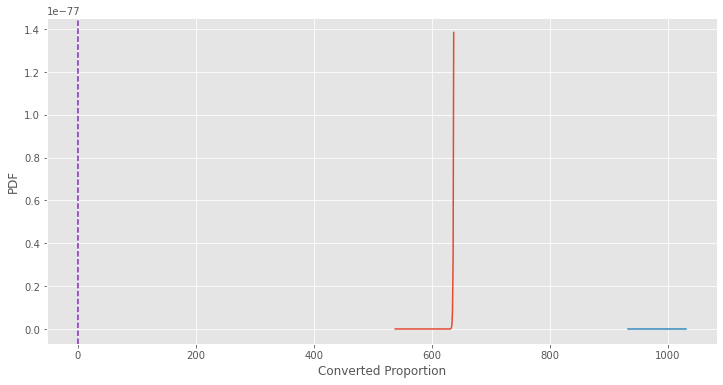

In [16]:
# standard error of the mean for both groups
SE_A = np.sqrt(p_A * (1-p_A)) / np.sqrt(A_total)
SE_B = np.sqrt(p_B * (1-p_B)) / np.sqrt(B_total)
# plot the null and alternative hypothesis
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0, p_B-p_A, 100)
yA = scs.norm(p_A, SE_A).pdf(x)
ax.plot(xA, yA)
ax.axvline(x=p_A, c='red', alpha=0.5, linestyle='--')
yB = scs.norm(p_B, SE_B).pdf(x)
ax.plot(xB, yB)
ax.axvline(x=p_B, c='blue', alpha=0.5, linestyle='--')
plt.xlabel('Converted Proportion')
plt.ylabel('PDF')

In [17]:
np.sqrt(p_A * (1-p_A))

0.36058862351940385

In [18]:
print(SE_A)
print(SE_B)


0.005833423432971666
0.0056161474339621814


The dashed lines represent the mean conversion rate for each group. The distance between the red dashed line and the blue dashed line is equal to mean difference between the control and test group. d_hat is the distribution of the difference between random variables from the two groups.

![title](6.gif)

Variance of the Sum

Recall that the null hypothesis states that the difference in probability between the two groups is zero. Therefore, the mean for this normal distribution will be at zero. The other property we will need for the normal distribution is the standard deviation or the variance. 

(Note: The variance is the standard deviation squared.) The variance of the difference will be dependent on the variances of the probability for both groups.
A basic property of variance is that the variance of the sum of two random independent variables is the sum of the variances.

![title](7.gif)

![title](8.gif)

This means that the null hypothesis and alternative 
hypothesis will have the same variance which will be the sum of the 
variances for the control group and the test group.

![title](9.gif)

The standard deviation can then be calculated as:
    
![title](10.gif)    

If we put this equation in terms of standard deviation for the Bernoulli distribution, s:

![title](11.gif)    

and we get the Satterthwaite approximation for pooled standard error. If we calculate the pooled probability and use the pooled probability to calculate the standard deviation for both groups, we get:

![title](2.png)    

where:
    
![title](12.gif)    

This is the same equation used in the Udacity course. Both equations for pooled standard error will give you very similar results.

With that, we now have enough information to construct the distributions for the null hypothesis and the alternative hypothesis.



#### Compare the Null Hypothesis vs. the Alternative Hypothesis
Let’s start off by defining the null hypothesis and the alternative hypothesis.

    ! The null hypothesis is the position that the change in the design made for the test group would result in no change in the conversion rate.

    ! The alternative hypothesis is the opposing position that the change in the design for the test group would result in an improvement (or reduction) in the conversion rate.

The null hypothesis will be a normal distribution with a mean of zero and a standard deviation equal to the pooled standard error.

![title](13.gif)    
![title](14.gif)




The alternative hypothesis has the same standard deviation as the null hypothesis, but the mean will be located at the difference in the conversion rate, d_hat. This makes sense because we can calculate the difference in the conversion rates directly from the data, 
but the normal distribution represents the possible 
values our experiment could have given us.

![title](15.gif)    
![title](16.gif)



$$ z = \frac{(\bar{x_1}-\bar{x_2})-D_0}{\sqrt{\sigma_1^{2}/n_1+\sigma_{2}^{2}/n_2}} $$

$$ z = \frac{(\hat{p_1}-\hat{p_2})-0}{\sqrt{\hat{p}\hat{q}(\frac{1}{n_1}+\frac{1}{n_2})}}$$

In [19]:
pooled_prob = (p_A*N_A + p_B*N_B) / (N_A + N_B)

In [20]:
z = (p_B - p_A)/(pooled_prob*(1-pooled_prob)*(1/N_A+1/N_B))**0.5

In [21]:
z > 1.64

True

In [22]:
z

5.1827257006909795

In [23]:
abplot

<function src.plot.abplot(N_A, N_B, bcr, d_hat, sig_level=0.05, show_power=False, show_alpha=False, show_beta=False, show_p_value=False, show_legend=True)>

Now that we understand the derivation of the pooled standard error, we can just directly plot the null and alternative hypotheses for future experiments. I wrote a script for quickly plotting 
the null and alternative hypotheses, abplot

In [24]:
# define the parameters for abplot()

n = N_A + N_B
bcr = p_A  
d_hat = p_B - p_A
# abplot(N_A, N_B, bcr, d_hat)

Visually, the plot for the null and alternative hypothesis looks very similar to the other plots above. Fortunately, both curves are identical in shape, so we can just compare the distance between the means of the two distributions. We can see that the alternative hypothesis curve suggests that the test group has a higher conversion rate than the control group. This plot also can be used to directly determine the statistical power.

## 4.Calculate the statistical power.

Statistical Power and Significance Level

I think it is easier to define statistical power and significance level by first showing how they are represented in the plot of the null and alternative hypothesis. We can return a visualization of the statistical power by adding the parameter show_power=True

In [25]:
# use the actual values from the experiment for bcr and d_hat
# p_A is the conversion rate of the control group
# p_B is the conversion rate of the test group
# N_A = 50000
# N_B = 5000
# p_A
# p_B
# SE_A
# SE_B
# p_A * (1-p_A)
var_A = p_A * (1-p_A)
var_B = p_B * (1-p_B)
z = d_hat/(var_A/N_A+var_B/N_B)**0.5
z

5.257814547461128

In [26]:
# abplot(N_A, N_B, bcr, d_hat, show_power=True)

The green shaded area represents the statistical power, and the calculated value for power is also displayed on the plot. The gray dashed lines in the plot above represent the confidence interval (95% for the plot above) for the null hypothesis. Statistical power is calculated by finding the area under the alternative hypothesis distribution and outside of the confidence interval of the null hypothesis.

After running our experiment, we get a resulting conversion rate for both groups. If we calculate the difference between the conversion rates, we end up with one result, the difference or the effect of the design change. Our task is to determine which population this result came from, the null hypothesis or the alternative hypothesis.

The area under the alternative hypothesis curve is equal to 1. If the alternative design is truly better, the power is the probability that we accept the alternative hypothesis and reject the null hypothesis and is equal to the area shaded green (true positive). The opposite area under the alternative curve is the probability that we accept the null hypothesis and reject the alternative hypothesis (false negative). This is referred to as beta in A/B testing or hypothesis testing and is shown below.

In [27]:
# abplot(N_A, N_B, bcr, d_hat, show_beta=True)

In [28]:
# abplot(N_A, N_B, bcr, d_hat, show_power=True)

If the null hypothesis is true and there truly is no difference between the control and test groups, then the significance level is the probability that we would reject the null hypothesis and accept the alternative hypothesis (false positive). A false positive is when we mistakenly conclude that the new design is better. This value is low because we want to limit this probability.

Oftentimes, a problem will be given with a desired confidence level instead of the significance level. A typical 95% confidence level for an A/B test corresponds to a significance level of 0.05.

![title](1.png)

Experiments are typically set up for a minimum desired power of 80%. If our new design is truly better, we want our experiment to show that there is at least an 80% probability that this is the case. Unfortunately, our current experiment only has a power of 0.594. We know that if we increase the sample size for each group, we will decrease the pooled variance for our null and alternative hypothesis. This will make our distributions much narrower and may increase the statistical power. Let’s take a look at how sample size will directly affect our results.

## 5.Sample size.

Our curves for the null and alternative hypothesis have become more narrow and more of the area under the alternative curve is located on the right of the gray dashed line. The result for power is greater than 0.80 and meets our benchmark for statistical power. We can now say that our results are statistically significant.

The next problem we should encounter is determining the minimum sample size we will need for the experiment. It is useful to know because it is directly related to how quickly we can complete your experiments and deliver statistically significant results to the design team. We can use the calculators available on the web, such as the ones below:

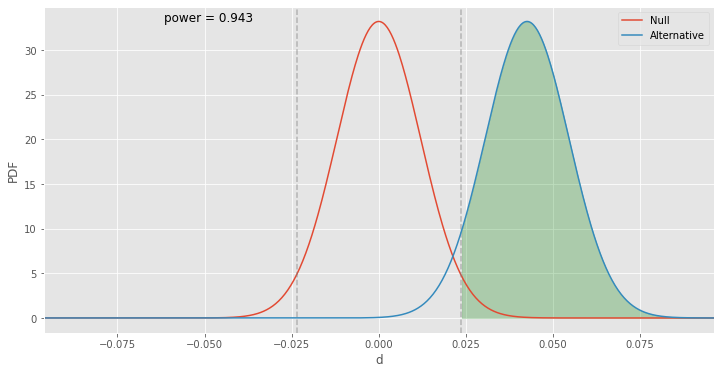

In [29]:
abplot(2000, 2000, bcr, d_hat, show_power=True)

We have the baseline conversion rate (bcr) and the minimum detectable effect, which is the minimum difference between the control and test group that we team will determine to be worth the investment of making the design change in the first place.

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        sig_level = sig_level/2
        area = 1 - sig_level
    else:
        area = 1 - sig_level

    z = z_dist.ppf(area)

    return z

  
def zplot(area=0.95, two_tailed=True, align_right=False):
    """Plots a z distribution with common annotations
    Example:
        zplot(area=0.95)
        zplot(area=0.80, two_tailed=False, align_right=True)
    Parameters:
        area (float): The area under the standard normal distribution curve.
        align (str): The area under the curve can be aligned to the center
            (default) or to the left.
    Returns:
        None: A plot of the normal distribution with annotations showing the
        area under the curve and the boundaries of the area.
    """
    # create plot object
    fig = plt.figure(figsize=(12, 6))
    ax = fig.subplots()
    # create normal distribution
    norm = scs.norm()
    # create data points to plot
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    ax.plot(x, y)

    # code to fill areas for two-tailed tests
    if two_tailed:
        left = norm.ppf(0.5 - area / 2)
        right = norm.ppf(0.5 + area / 2)
        ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
        ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')

        ax.fill_between(x, 0, y, color='grey', alpha=0.25,
                        where=(x > left) & (x < right))
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), fontsize=12,
                 rotation=90, va="bottom", ha="right")
        plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                 fontsize=12, rotation=90, va="bottom", ha="left")
    # for one-tailed tests
    else:
        # align the area to the right
        if align_right:
            left = norm.ppf(1-area)
            ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha=0.25,
                            where=x > left)
            plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left),
                     fontsize=12, rotation=90, va="bottom", ha="right")
        # align the area to the left
        else:
            right = norm.ppf(area)
            ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha=0.25,
                            where=x < right)
            plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                     fontsize=12, rotation=90, va="bottom", ha="left")

    # annotate the shaded area
    plt.text(0, 0.1, "shaded area = {0:.3f}".format(area), fontsize=12,
             ha='center')
    # axis labels
    plt.xlabel('z')
    plt.ylabel('PDF')

    plt.show()

In [31]:
print(z)
print(z_val(sig_level=0.05,two_tailed=False))
print(z>z_val(sig_level=0.05,two_tailed=False))

5.257814547461128
1.6448536269514722
True


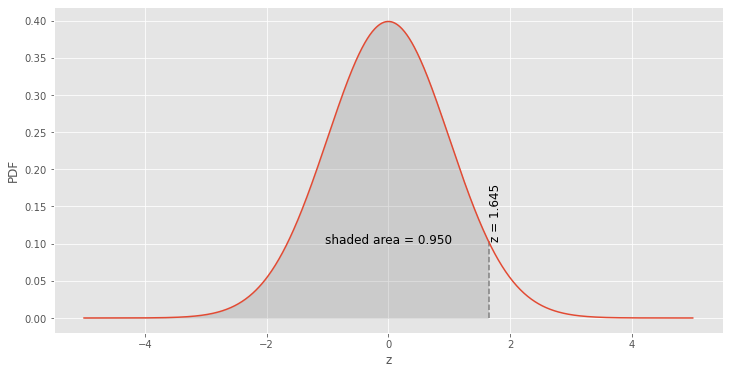

In [32]:
zplot(area=0.95, two_tailed=False, align_right=False)

Here is the Python code that performs the same calculation for minimum sample size:

## Equation for minimum necessary sample size
From a lecture on sample sizes:
http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf

http://powerandsamplesize.com/Calculators/Compare-2-Proportions/2-Sample-1-Sided
$$ n_A = k*n_B $$

$$ n_B = (\frac{p_A(1-p_A)}{k}+p_B(1-p_B)) (\frac{Z_{1-\alpha} + Z_{1-\beta}}{p_A-p_B})^{2}$$

$$ n = \frac{2(\bar{p})(1-\bar{p})(Z_{1-\beta}+Z_{1-\alpha})^2}{(p_B-p_A)^2}$$

In [33]:
p_A

0.15362470557445695

In [34]:
# p_A
# p_B
sig_level = 0.05
beta = 0.2
k = N_A/N_B
standard_norm = scs.norm(0, 1)
Z_beta = standard_norm.ppf(1-beta)
Z_alpha = standard_norm.ppf(1-sig_level)
# Z_alpha = z_val(sig_level=0.05,two_tailed=False)
print(Z_beta)
print(Z_alpha)
print(k)
nb = (p_A*(1-p_A)/k+p_B*(1-p_B))*((Z_alpha+Z_beta)**2)/((p_B-p_A)**2)
print((p_A*(1-p_A)/k+p_B*(1-p_B)))
print((Z_alpha+Z_beta)**0.05)
print(((p_B-p_A)**0.05))
print(nb)

0.8416212335729143
1.6448536269514722
0.7642
0.3278497047417147
1.0465963206640625
0.8540000242053553
1118.2209441020757


In [35]:
import scipy.stats as scs

# def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
def min_sample_size(N_A, N_B, p_A, p_B, power=0.8, sig_level=0.05, two_sided = False):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
        http://powerandsamplesize.com/Calculators/Compare-2-Proportions/2-Sample-1-Sided
    """
    
    k = N_A/N_B
    
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    if two_sided == True:
        Z_alpha = standard_norm.ppf(1-sig_level/2)
    else:
        Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
#     pooled_prob = (bcr + bcr+mde) / 2
    pooled_prob = (p_A + p_B) / 2
#     pooled_prob = (p_A*N_A + p_B*N_B) / (N_A + N_B)

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2 / mde**2)
#     min_N = (p_A*(1-p_A)/k+p_B*(1-p_B))*((Z_alpha+Z_beta)**2)/((p_B-p_A)**2)
    

    return min_N

In [36]:
bcr+mde

0.1962

In [37]:
pooled_prob = (bcr + bcr+mde) / 2

In [38]:
pooled_prob

0.1749123527872285

In [39]:
min_sample_size(N_A, N_B, p_A, p_B, power=0.8, sig_level=0.05, two_sided = False)

1249.8068972849476

In [40]:
Z_beta + Z_alpha

2.4864748605243863

In [41]:
min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2 / mde**2)
min_N

984.4720435225323

This equation returns an answer by running another A/B experiment with the sample size that results from the equation.

In [42]:
# min_sample_size(bcr=p_A, mde=p_B-p_A)

In [43]:
abplot

<function src.plot.abplot(N_A, N_B, bcr, d_hat, sig_level=0.05, show_power=False, show_alpha=False, show_beta=False, show_p_value=False, show_legend=True)>

In [44]:
p_B-p_A

0.04257529442554306

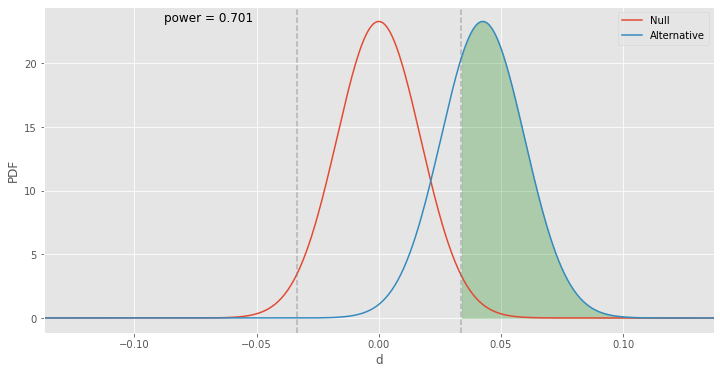

In [45]:
from src.plot import *
abplot(N_A = 984, N_B = 984, bcr = p_A, d_hat = p_B-p_A, sig_level=0.05, show_power=True,
           show_alpha=False, show_beta=False, show_p_value=False,
           show_legend=True)

The calculated power for this sample size was approximately 0.80. Therefore, if our design change had an improvement in conversion of about 4.26 percent, we would need at least 984 samples in each group for a statistical power of at least 0.80.

That was a very long but basic walkthrough of A/B tests. Once you have developed an understanding and familiarity with the procedure, you will probably be able to run an experiment and go directly to the plots for the null and alternative hypothesis to determine if your results achieved enough power. By calculating the minimum sample size you need prior to the experiment, you can determine how long it will take to get the results back to your team for a final decision.

# Simulation

In [46]:
# calculate the minimum n
import scipy.stats as scs
alpha = 0.05
confidence = np.array(1-alpha)
power = np.array(0.8)

z_alpha = scs.norm.ppf(confidence)
z_beta = scs.norm.ppf(power)

In [47]:
# define function for simulation:
from random import sample
def AB_test(na,nb):
    A_sample = sample(list(ab_data[ab_data['group']=='A']['converted'].values),na)
    B_sample = sample(list(ab_data[ab_data['group']=='B']['converted'].values),nb)


    p_a = np.sum(A_sample)/len(A_sample)
    p_b = np.sum(B_sample)/len(B_sample)
    
    s_A = np.asarray(A_sample).std()
    s_B = np.asarray(B_sample).std()
    
    sp_2 = ((na-1)*(s_A**2)+(nb-1)*(s_B**2))/(na+nb-2)
    
    z_stats  =  np.absolute(p_a-p_b)/np.sqrt(sp_2*((1/na)+(1/nb)))
    
    if z_stats>z_alpha:
        return 1,z_stats
    else:
        return 0,z_stats

In [48]:
outcomes = [AB_test(984,984) for i in range(1,10)]
outcomes

[(1, 1.7407208501442408),
 (1, 3.006920839403016),
 (1, 1.732531351316605),
 (1, 2.5652809130211),
 (1, 1.8394095503569252),
 (1, 1.6484532067483464),
 (1, 2.7792324533269457),
 (1, 3.114762286656673),
 (1, 3.7448996603656055)]

In [49]:
ab_data.head()

,group,converted
5,A,False
7,B,False
9,A,False
10,A,False
11,A,False


In [50]:
ab_data[ab_data['group']=='B']['converted'].values

array([False, False, False, ...,  True, False, False])

In [51]:
import math
alpha = 0.05
beta = 0.2
ln_A = math.log(1/alpha)
ln_B = math.log(beta)
ln_0_xi = math.log((1-p_B)/(1-p_A))
ln_1_xi = math.log((p_B)/p_A)
# define the function for the number
def SPRT():
    B_sample = sample(list(ab_data[ab_data['group']=='B']['converted'].values),984)
    ln_lamba = 0
    i=0
    for record in B_sample:
        if ln_lamba<ln_A and ln_lamba>ln_B:
            if record==0:
                ln_lamba=ln_lamba+ln_0_xi
            else:
                ln_lamba=ln_lamba+ln_1_xi
            i+=1
        elif ln_lamba>=ln_A:
            return(i,'accept H1')
            break
        else:
            return(i,'accept H0')
            break

Sequential probability ratio test

$$ln(A)=ln(\frac{1}{\alpha})$$

$$ln(B)=ln(\beta)$$

update:
$$ln(\lambda_n)=ln(\lambda_{n-1})+ln(\lambda(x_i))$$

if $x_i = 1$, $ln(\lambda(x_i))=ln(\frac{p_A}{p_B})$

if $x_i = 0$, $ln(\lambda(x_i))=ln(\frac{1-p_A}{1-p_B})$

since for neither scenario*$x_i=1$ nor $x_i=0$ is $ln(\lambda_n)<=ln(B)$ or $ln(\lambda_n)>=ln(A)$

continue trials repeating steps 4-6

In [52]:
[SPRT() for i in range(10)]

[(113, 'accept H1'),
 (177, 'accept H1'),
 (251, 'accept H1'),
 (95, 'accept H0'),
 (359, 'accept H1'),
 (124, 'accept H0'),
 (60, 'accept H0'),
 (371, 'accept H1'),
 (358, 'accept H1'),
 (623, 'accept H1')]